看代码前先看看文章

[漫威 DC 宇宙英雄综合实力可视化对比分析](https://www.makcyun.top/data_analysis&mining05.html)

[漫威电影宇宙，宇宙票房收割机](https://www.makcyun.top/data_analysis&mining04.html)

### 数据清洗整理 

In [120]:
import pymongo
import pandas as pd 
import pyquery as pq
import os 

In [191]:
# # 从mongodb 中读入
# client = pymongo.MongoClient('localhost',port=27017)
# db = client['marvel']
# mongo_collection = db['marvel_stats']

# data = pd.DataFrame(list(mongo_collection.find()))
# data.drop(['_id','image'],axis=1,inplace=True)
# data = data[['id','name','gender','intelligence','power','speed','durability','combat','strength','alignment','race',
# 'height','weight','publisher']]
# data.head()

In [160]:
# 从csv中读入 
data = pd.read_csv('./marvel.csv')
data.head()

,id,name,gender,intelligence,power,speed,durability,combat,strength,alignment,race,height,weight,publisher
0,3,Abin Sur,Male,50.0,99.0,53.0,64.0,65.0,90.0,good,Ungaran,185 cm,90 kg,DC Comics
1,2,Abe Sapien,Male,88.0,100.0,35.0,65.0,85.0,28.0,good,Icthyo Sapien,191 cm,65 kg,Dark Horse Comics
2,1,A-Bomb,Male,38.0,24.0,17.0,80.0,64.0,100.0,good,Human,203 cm,441 kg,Marvel Comics
3,4,Abomination,Male,63.0,62.0,53.0,90.0,95.0,80.0,bad,Human / Radiation,203 cm,441 kg,Marvel Comics
4,6,Absorbing Man,Male,38.0,98.0,25.0,100.0,64.0,80.0,bad,Human,193 cm,122 kg,Marvel Comics


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 14 columns):
id              725 non-null int64
name            725 non-null object
gender          725 non-null object
intelligence    561 non-null float64
power           561 non-null float64
speed           561 non-null float64
durability      561 non-null float64
combat          561 non-null float64
strength        623 non-null float64
alignment       725 non-null object
race            425 non-null object
height          725 non-null object
weight          725 non-null object
publisher       710 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 79.4+ KB


In [161]:
# mongodb: 替换str 'null'为0 然后转换为 int
# data.replace('null','0',inplace=True)
# data = data.apply(pd.to_numeric,errors='ignore')
# data = data.apply(pd.to_numeric,errors='ignore')

# csv:替换 nan 为0
data = data.fillna(0)
data 

,id,name,gender,intelligence,power,speed,durability,combat,strength,alignment,race,height,weight,publisher
0,3,Abin Sur,Male,50.0,99.0,53.0,64.0,65.0,90.0,good,Ungaran,185 cm,90 kg,DC Comics
1,2,Abe Sapien,Male,88.0,100.0,35.0,65.0,85.0,28.0,good,Icthyo Sapien,191 cm,65 kg,Dark Horse Comics
2,1,A-Bomb,Male,38.0,24.0,17.0,80.0,64.0,100.0,good,Human,203 cm,441 kg,Marvel Comics
3,4,Abomination,Male,63.0,62.0,53.0,90.0,95.0,80.0,bad,Human / Radiation,203 cm,441 kg,Marvel Comics
4,6,Absorbing Man,Male,38.0,98.0,25.0,100.0,64.0,80.0,bad,Human,193 cm,122 kg,Marvel Comics
5,7,Adam Monroe,Male,63.0,100.0,12.0,100.0,64.0,10.0,good,0,0 cm,0 kg,NBC - Heroes
6,5,Abraxas,Male,88.0,100.0,83.0,100.0,55.0,63.0,bad,Cosmic Entity,0 cm,0 kg,Marvel Comics
7,9,Agent 13,Female,0.0,0.0,0.0,0.0,0.0,46.0,good,0,173 cm,61 kg,Sharon Carter
8,10,Agent Bob,Male,10.0,5.0,13.0,5.0,20.0,8.0,good,Human,178 cm,81 kg,Marvel Comics
9,8,Adam Strange,Male,69.0,37.0,33.0,40.0,50.0,10.0,good,Human,185 cm,88 kg,DC Comics


In [162]:
# 转换身高
data['height'] = data['height'].str.replace(' cm','')

rows_meters = data['height'].str.contains('meters')
data.loc[rows_meters,'height'] = pd.to_numeric(data.loc[rows_meters,'height'].str.replace(' meters',''))*100

data['height'] =  pd.to_numeric(data['height'])/100 
data.head()

,id,name,gender,intelligence,power,speed,durability,combat,strength,alignment,race,height,weight,publisher
0,3,Abin Sur,Male,50.0,99.0,53.0,64.0,65.0,90.0,good,Ungaran,1.85,90 kg,DC Comics
1,2,Abe Sapien,Male,88.0,100.0,35.0,65.0,85.0,28.0,good,Icthyo Sapien,1.91,65 kg,Dark Horse Comics
2,1,A-Bomb,Male,38.0,24.0,17.0,80.0,64.0,100.0,good,Human,2.03,441 kg,Marvel Comics
3,4,Abomination,Male,63.0,62.0,53.0,90.0,95.0,80.0,bad,Human / Radiation,2.03,441 kg,Marvel Comics
4,6,Absorbing Man,Male,38.0,98.0,25.0,100.0,64.0,80.0,bad,Human,1.93,122 kg,Marvel Comics


In [163]:
# 转换体重
data['weight'] = data['weight'].str.replace(' kg','')

rows_meters = data['weight'].str.contains('tons')
data.loc[rows_meters,'weight'] = pd.to_numeric(data.loc[rows_meters,'weight'].str.replace(' tons',''))*1000
data['weight'] =  pd.to_numeric(data['weight'])
data.head()

,id,name,gender,intelligence,power,speed,durability,combat,strength,alignment,race,height,weight,publisher
0,3,Abin Sur,Male,50.0,99.0,53.0,64.0,65.0,90.0,good,Ungaran,1.85,90,DC Comics
1,2,Abe Sapien,Male,88.0,100.0,35.0,65.0,85.0,28.0,good,Icthyo Sapien,1.91,65,Dark Horse Comics
2,1,A-Bomb,Male,38.0,24.0,17.0,80.0,64.0,100.0,good,Human,2.03,441,Marvel Comics
3,4,Abomination,Male,63.0,62.0,53.0,90.0,95.0,80.0,bad,Human / Radiation,2.03,441,Marvel Comics
4,6,Absorbing Man,Male,38.0,98.0,25.0,100.0,64.0,80.0,bad,Human,1.93,122,Marvel Comics


In [164]:
# 新增总分列并排名 total_score = 六个指标得分和
data['total_score'] = data[['intelligence','power','strength','speed','durability','combat']].sum(axis=1)
data = data.sort_values(by='total_score',ascending=False).reset_index(drop=True)
data['score_rank'] = data.index + 1 
data

,id,name,gender,intelligence,power,speed,durability,combat,strength,alignment,race,height,weight,publisher,total_score,score_rank
0,426,Man of Miracles,-,100.0,100.0,100.0,100.0,100.0,100.0,-,God / Eternal,0.00,0,Image Comics,600.0,1
1,278,General Zod,Male,94.0,100.0,96.0,100.0,95.0,100.0,bad,Kryptonian,0.00,0,DC Comics,585.0,2
2,80,Beyonder,Male,100.0,100.0,100.0,100.0,84.0,100.0,good,God / Eternal,0.00,0,Marvel Comics,584.0,3
3,642,Superboy-Prime,Male,94.0,100.0,100.0,100.0,85.0,100.0,bad,Kryptonian,1.80,77,DC Comics,579.0,4
4,644,Superman,Male,94.0,100.0,100.0,100.0,85.0,100.0,good,Kryptonian,1.91,101,Superman Prime One-Million,579.0,5
5,637,Steppenwolf,Male,94.0,100.0,83.0,100.0,100.0,100.0,bad,New God,1.83,91,DC Comics,577.0,6
6,432,Martian Manhunter,Male,100.0,100.0,92.0,100.0,85.0,95.0,good,Martian,2.01,135,DC Comics,572.0,7
7,524,Power Girl,Female,94.0,100.0,100.0,100.0,75.0,100.0,good,Kryptonian,1.80,81,DC Comics,569.0,8
8,643,Supergirl,Female,94.0,100.0,100.0,100.0,75.0,100.0,good,Kryptonian,1.65,54,DC Comics,569.0,9
9,686,Vegeta,Male,81.0,100.0,92.0,95.0,100.0,100.0,bad,Saiyan,1.68,73,Shueisha,568.0,10


### 分析 

#### 战力最强角色

In [168]:
data.sort_values(by='score_rank')[:10][['name','publisher','total_score']]

,name,publisher,total_score
0,Man of Miracles,Image Comics,600.0
1,General Zod,DC Comics,585.0
2,Beyonder,Marvel Comics,584.0
3,Superboy-Prime,DC Comics,579.0
4,Superman,Superman Prime One-Million,579.0
5,Steppenwolf,DC Comics,577.0
6,Martian Manhunter,DC Comics,572.0
7,Power Girl,DC Comics,569.0
8,Supergirl,DC Comics,569.0
9,Vegeta,Shueisha,568.0


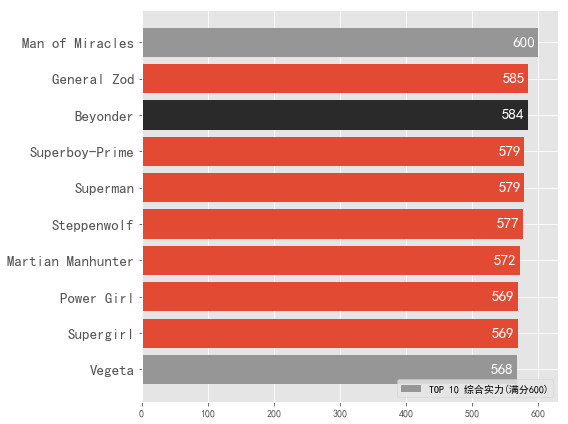

In [167]:
# 绘条形图
name = data.sort_values(by='score_rank')[:10]['name'].values.tolist()
score = data.sort_values(by='score_rank')[:10]['total_score'].values.tolist()
data_top = pd.DataFrame({'name':name,'score':score})[::-1] #倒序

plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(8,6))

grey = '#969696'#深灰
red = '#E24A33' #红色

color = [grey, red, red, red, red, red, red, '#2A2A2A', red, grey]
barh = ax.barh(np.arange(10),
               data_top['score'],
               color=color)
for y,x in enumerate(data_top['score'].values.tolist()):
   ax.text(x-5,y-0.1,'%i'%x,
            ha='right',
            size=15,
            color='#FFFFFF')
ax.set_yticks(np.arange(10))
ax.set_yticklabels(data_top['name'].tolist(),size=15)

ax.legend(['TOP 10 综合实力(满分600)'],loc='lower right')
plt.tight_layout()
plt.savefig('top10.jpg',dpi=200)

#### 最高的人

In [142]:
data.sort_values(by='height',ascending=False)[['name','height','total_score']].reset_index(drop='True')[:10]

,name,height,total_score
0,Ymir,304.80,403.0
1,Godzilla,108.00,418.0
2,Giganta,62.50,352.0
3,Anti-Monitor,61.00,528.0
4,King Kong,30.50,424.0
5,Bloodwraith,30.50,72.0
6,Utgard-Loki,15.20,386.0
7,Fin Fang Foom,9.75,399.0
8,Galactus,8.76,533.0
9,Groot,7.01,427.0


#### 最重的人

In [144]:
data.sort_values(by='weight',ascending=False)[['name','weight','total_score']].reset_index(drop='True')[:10]

,name,weight,total_score
0,Godzilla,90000000,418.0
1,King Kong,9000000,424.0
2,Utgard-Loki,58000,386.0
3,Fin Fang Foom,18000,399.0
4,Galactus,16000,533.0
5,Groot,4000,427.0
6,Iron Monger,2000,379.0
7,Sasquatch,900,291.0
8,Juggernaut,855,441.0
9,Darkseid,817,566.0


### 复联成员排名

In [56]:
members = ['Captain Marvel','Black Panther','Star-Lord','Spider Man','Doctor Strange',
           'Ant-Man','Winter Soldier','Loki','Vision','Scarlet Witch']
marvel = pd.DataFrame({'name':members}) 

In [18]:
marvel.merge(data,how='inner',on='name')

,name,alignment,combat,durability,gender,height,id,intelligence,power,publisher,race,speed,strength,weight,total_score,score_rank
0,Captain Marvel,good,75,95,Male,1.93,156,88,100,DC Comics,Human,88,100,101,546,22
1,Captain Marvel,good,90,95,Female,1.80,157,84,100,Binary,Human-Kree,71,88,74,528,35
2,Black Panther,good,100,60,Male,1.83,106,88,41,Marvel Comics,Human,30,16,90,335,258
3,Star-Lord,good,70,50,Male,1.88,630,69,25,Marvel Comics,Human-Spartoi,33,20,79,267,385
4,Doctor Strange,good,60,84,Male,1.88,226,100,100,Marvel Comics,Human,12,10,81,366,204
5,Ant-Man,good,32,28,Male,2.11,30,100,32,Giant-Man,Human,23,18,122,233,449
6,Winter Soldier,good,84,65,Male,1.75,714,56,60,Marvel Comics,Human,35,32,117,332,267
7,Loki,bad,60,85,Male,1.93,414,88,100,Marvel Comics,Asgardian,46,63,236,442,96
8,Vision,good,70,95,Male,1.91,697,100,100,Anti-Vision,Android,54,72,135,491,50
9,Scarlet Witch,bad,80,70,Female,1.70,579,100,100,Marvel Comics,Mutant,29,10,59,389,167


In [19]:
marvel_good = pd.read_csv('./marvel_good.csv')
marvel_good.head()

,name_cn,name
0,原子弹,A-Bomb
1,天使,Archangel
2,海妖,Banshee
3,野兽,Beast
4,主教,Bishop


In [20]:
marvel_bad = pd.read_csv('./marvel_bad.csv')
marvel_bad.head()

,name_cn,name
0,恶煞,Abomination
1,吸收人,Absorbing Man
2,歼灭者,Annihilus
3,天启,Apocalypse
4,莫多男爵,Baron Mordo


#### 漫威正派 

In [21]:
marvel_good2 = marvel_good.merge(data,how='inner',on='name')
marvel_good2 = marvel_good2.drop_duplicates(subset=['name','publisher'],keep='last').reset_index(drop=True)
marvel_good2.sort_values(by='score_rank')

,name_cn,name,alignment,combat,durability,gender,height,id,intelligence,power,publisher,race,speed,strength,weight,total_score,score_rank
74,雷神索尔,Thor,good,100,100,Male,1.98,659,69,100,Rune King Thor,Asgardian,83,100,288,552,17
48,惊奇队长,Captain Marvel,good,75,95,Male,1.93,156,88,100,DC Comics,Human,88,100,101,546,22
35,绿巨人,Hulk,good,85,100,Male,2.44,332,88,98,Marvel Comics,Human / Radiation,63,100,630,534,28
49,惊奇队长,Captain Marvel,good,90,95,Female,1.80,157,84,100,Binary,Human-Kree,71,88,74,528,35
65,哨兵,Sentry,neutral,40,84,Male,1.88,583,75,100,Marvel Comics,Mutant,100,100,87,499,44
42,钢铁侠,Iron Man,good,64,85,Male,1.98,346,100,100,Marvel Comics,Human,58,85,191,492,48
80,幻视,Vision,good,70,95,Male,1.91,697,100,100,Anti-Vision,Android,54,72,135,491,50
82,战争机器,War Machine,good,85,100,Male,1.85,703,63,100,Marvel Comics,Human,63,80,95,491,51
34,大力士,Hercules,good,100,85,Male,1.96,325,63,89,Marvel Comics,Demi-God,46,100,146,483,56
6,黑蝠王,Black Bolt,good,56,84,Male,1.88,96,75,100,Marvel Comics,Inhuman,100,67,95,482,59


#### 漫威反派 

In [22]:
marvel_bad2 = marvel_bad.merge(data,how='inner',on='name')
# marvel_good2 = marvel_good2.drop_duplicates(subset=['name'],keep='last').reset_index(drop=True)
marvel_bad2.sort_values(by='score_rank')

,name_cn,name,alignment,combat,durability,gender,height,id,intelligence,power,publisher,race,speed,strength,weight,total_score,score_rank
9,多玛暮,Dormammu,bad,80,100,Male,1.85,232,88,100,Marvel Comics,0,83,95,0,546,20
12,行星吞噬者*,Galactus,neutral,50,100,Male,8.76,273,100,100,Marvel Comics,Cosmic Entity,83,100,16000,533,30
38,灭霸,Thanos,bad,80,100,Male,2.01,655,100,100,Marvel Comics,Eternal,33,100,443,513,40
3,天启,Apocalypse,bad,60,100,Male,2.13,35,100,100,Marvel Comics,Mutant,33,100,135,493,47
39,奥创,Ultron,bad,64,100,Male,2.06,680,88,100,Marvel Comics,Android,42,83,331,477,61
6,屠杀,Carnage,bad,90,84,Male,1.85,162,63,88,Marvel Comics,Symbiote,70,63,86,458,74
23,万磁王*,Magneto,bad,80,84,Male,1.88,423,88,91,Marvel Comics,Mutant,27,80,86,450,87
25,梅菲斯特,Mephisto,bad,42,95,Male,1.98,443,88,100,Marvel Comics,0,35,85,140,445,94
0,恶煞,Abomination,bad,95,90,Male,2.03,4,63,62,Marvel Comics,Human / Radiation,53,80,441,443,95
22,洛基*,Loki,bad,60,85,Male,1.93,414,88,100,Marvel Comics,Asgardian,46,63,236,442,96


In [23]:
marvel_bad2.sort_values(by='total_score',ascending=False).reset_index(drop=True)

,name_cn,name,alignment,combat,durability,gender,height,id,intelligence,power,publisher,race,speed,strength,weight,total_score,score_rank
0,多玛暮,Dormammu,bad,80,100,Male,1.85,232,88,100,Marvel Comics,0,83,95,0,546,20
1,行星吞噬者*,Galactus,neutral,50,100,Male,8.76,273,100,100,Marvel Comics,Cosmic Entity,83,100,16000,533,30
2,灭霸,Thanos,bad,80,100,Male,2.01,655,100,100,Marvel Comics,Eternal,33,100,443,513,40
3,天启,Apocalypse,bad,60,100,Male,2.13,35,100,100,Marvel Comics,Mutant,33,100,135,493,47
4,奥创,Ultron,bad,64,100,Male,2.06,680,88,100,Marvel Comics,Android,42,83,331,477,61
5,屠杀,Carnage,bad,90,84,Male,1.85,162,63,88,Marvel Comics,Symbiote,70,63,86,458,74
6,万磁王*,Magneto,bad,80,84,Male,1.88,423,88,91,Marvel Comics,Mutant,27,80,86,450,87
7,梅菲斯特,Mephisto,bad,42,95,Male,1.98,443,88,100,Marvel Comics,0,35,85,140,445,94
8,恶煞,Abomination,bad,95,90,Male,2.03,4,63,62,Marvel Comics,Human / Radiation,53,80,441,443,95
9,洛基*,Loki,bad,60,85,Male,1.93,414,88,100,Marvel Comics,Asgardian,46,63,236,442,96


#### 雷神超人

C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


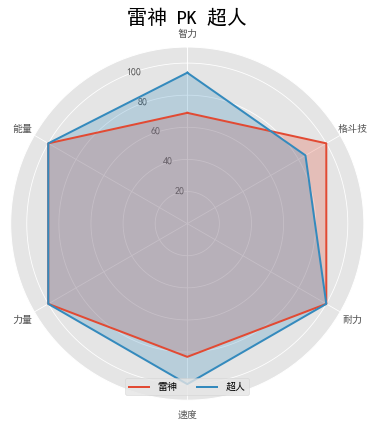

In [188]:
fig = plt.figure(figsize=(10, 6))
names = ['Thor','Superman']
scores = pd.DataFrame({'name':names}) 
names_cn = ['雷神','超人']
 
scores = scores.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
scores = scores.values.tolist()

zipped = zip(scores,names_cn)

# title = ['intelligence','power','strength','speed','durability','combat']   #标签
title = ['智力', '能量', '力量', '速度', '耐力', '格斗技']  # 标签

for value, name in zipped: 
    theta = np.linspace(0, 2*np.pi, len(value), endpoint=False)  # 将圆根据标签的个数等比分
    theta = np.concatenate((theta, [theta[0]]))  # 闭合
    
    value = np.concatenate((value, [value[0]]))  # 闭合

    # 这里一定要设置为极坐标格式
    ax = fig.add_subplot(111, polar=True)

    ax.plot(theta, value, lw=2, alpha=1,label=name)  # 绘图
    ax.fill(theta, value, alpha=0.25)  # 填充

ax.set_thetagrids(theta*180/np.pi,title)         #替换标签
ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
ax.set_title('雷神 PK 超人',fontsize = 20)   #添加图描述
 
plt.legend(loc='lower center',ncol=2)
plt.tight_layout()
fig.savefig('雷神PK超人.jpg',dpi=200)

C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


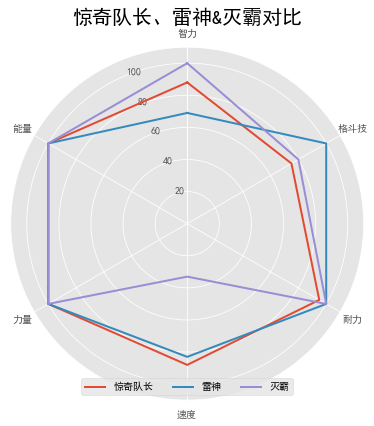

In [174]:
# import numpy as np
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))

names = ['Captain Marvel','Thor','Thanos']
scores = pd.DataFrame({'name':names}) 

# 提取 A6 得分 
scores = scores.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
scores = scores.drop(index=[1]) 
scores = scores.values.tolist()
names_cn = ['惊奇队长','雷神','灭霸']   #标签
zipped = zip(scores,names_cn)

title = ['智力', '能量', '力量', '速度', '耐力', '格斗技']  # 标签

for value, name in zipped: 
    theta = np.linspace(0, 2*np.pi, len(value), endpoint=False)  # 将圆根据标签的个数等比分
    theta = np.concatenate((theta, [theta[0]]))  # 闭合
    value = np.concatenate((value, [value[0]]))  # 闭合

    ax = fig.add_subplot(111, polar=True)
    ax.plot(theta, value, lw=2, alpha=1,label=name)  # 绘图
#     ax.fill(theta, value, alpha=0.25)  # 填充

ax.set_thetagrids(theta*180/np.pi,title)         #替换标签
ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
ax.set_title('惊奇队长、雷神&灭霸对比',fontsize = 20)   #添加图描述
 
plt.legend(loc='lower center',ncol=6)
plt.tight_layout()
fig.savefig('惊奇队长雷神灭霸.jpg',dpi=200)

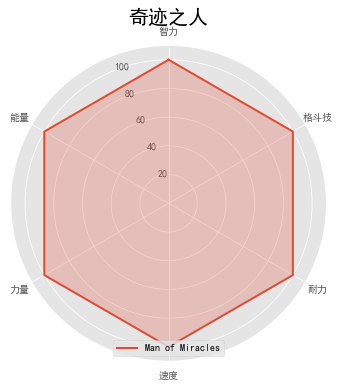

In [190]:
fig = plt.figure(figsize=(10, 6))
names = ['Man of Miracles']
scores = pd.DataFrame({'name':names}) 

# 提取 A6 得分 
scores = scores.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
scores = scores.values.tolist()

names_cn = ['Man of Miracles']   #标签
zipped = zip(scores,names_cn)

# title = ['intelligence','power','strength','speed','durability','combat']   #标签
title = ['智力', '能量', '力量', '速度', '耐力', '格斗技']  # 标签


for i in avenger:
    for value, name in zipped: 
        theta = np.linspace(0, 2*np.pi, len(value), endpoint=False)  # 将圆根据标签的个数等比分
        theta = np.concatenate((theta, [theta[0]]))  # 闭合

        value = np.concatenate((value, [value[0]]))  # 闭合

        # 这里一定要设置为极坐标格式
        ax = fig.add_subplot(111, polar=True)

        ax.plot(theta, value, lw=2, alpha=1,label=name)  # 绘图
        ax.fill(theta, value, alpha=0.25)  # 填充

    ax.set_thetagrids(theta*180/np.pi,title)         #替换标签
    ax.set_ylim(0,110)                          #设置极轴的区间
    ax.set_theta_zero_location('N')         #设置极轴方向
    ax.set_title('奇迹之人',fontsize = 20)   #添加图描述

    plt.legend(loc='lower center',ncol=6)
    plt.tight_layout()
    fig.savefig('奇迹之人.jpg',dpi=200)

#### A6单人战力图

In [35]:
# A6单人战力 

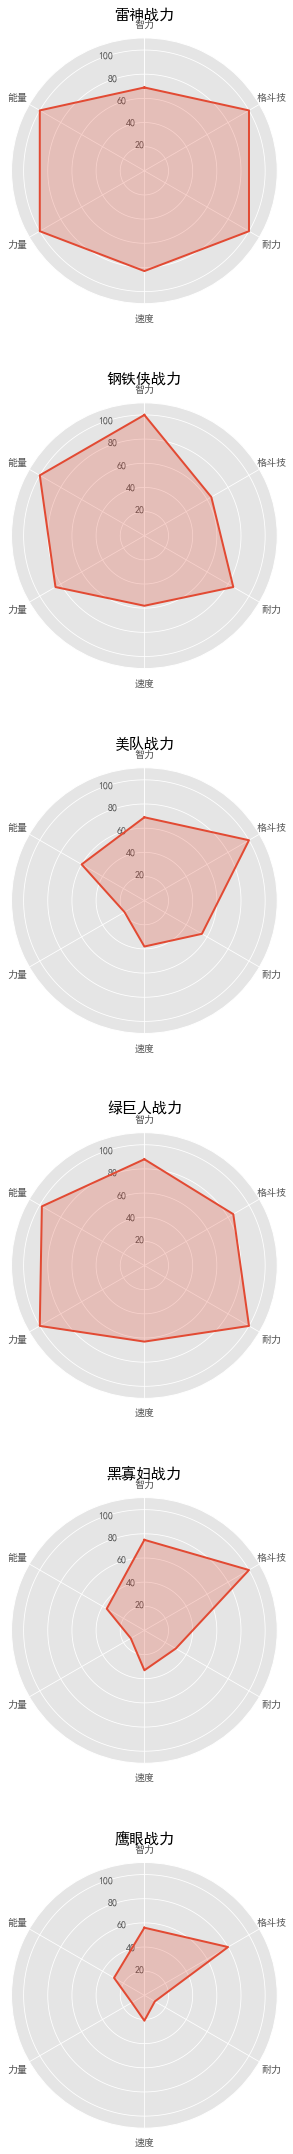

In [184]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.figure(figsize=(5, 30))

names = ['Thor','Iron Man','Captain America','Hulk','Black Widow','Hawkeye']
names_cn = ['雷神','钢铁侠','美队','绿巨人','黑寡妇','鹰眼']   #标签
title = ['智力', '能量', '力量', '速度', '耐力', '格斗技']  # 标签

# 从data查询A6 数据
scores = pd.DataFrame({'name':names})
scores = scores.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
# 转换为list
scores = scores.values.tolist()

zipped = zip(scores,names_cn)
# for循环生成A6成员雷达图
for i,(value, name) in enumerate(zipped): 
    ax= 'ax%s'%i
    theta = np.linspace(0, 2*np.pi, len(value), endpoint=False)  # 将圆根据标签的个数等比分
    theta = np.concatenate((theta, [theta[0]]))  # 闭合
    
    value = np.concatenate((value, [value[0]]))  # 闭合

    # 这里要设置为极坐标格式
    ax = plt.subplot2grid(shape=(6,1), loc=(i,0),polar=True)
    ax.plot(theta, value, lw=2, alpha=1,label=name)  # 绘图
    ax.fill(theta, value, alpha=0.25)  # 填充

    ax.set_thetagrids(theta*180/np.pi,title)         #替换标签
    ax.set_ylim(0,110)                          #设置极轴的区间
    ax.set_theta_zero_location('N')         #设置极轴方向
    ax.set_title('%s战力'%name,fontsize = 15)   #添加图描述
 
plt.tight_layout(h_pad=5.0)
plt.savefig('A6单人战力.jpg',dpi=200)

#### A6 汇总

In [177]:
names = ['Thor','Iron Man','Captain America','Hulk','Black Widow','Hawkeye']
A6 = pd.DataFrame({'name':names})

In [178]:
# 提取 A6 得分 
score_A6 = A6.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
scores = score_A6.values.tolist()
scores

[[69.0, 100.0, 100.0, 83.0, 100.0, 100.0],
 [100.0, 100.0, 85.0, 58.0, 85.0, 64.0],
 [69.0, 60.0, 19.0, 38.0, 55.0, 100.0],
 [88.0, 98.0, 100.0, 63.0, 100.0, 85.0],
 [75.0, 36.0, 13.0, 33.0, 30.0, 100.0],
 [56.0, 29.0, 12.0, 21.0, 10.0, 80.0]]

C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


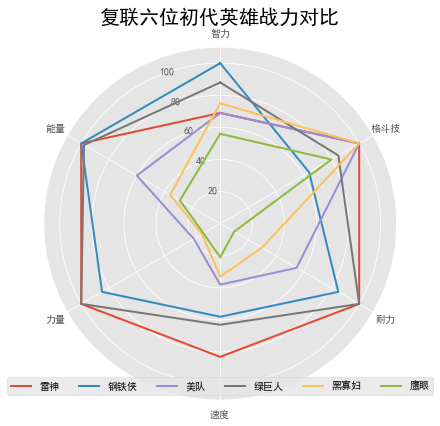

In [179]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))

names = ['Thor','Iron Man','Captain America','Hulk','Black Widow','Hawkeye']   #标签
names_cn = ['雷神','钢铁侠','美队','绿巨人','黑寡妇','鹰眼']   #标签
zipped = zip(scores,names_cn)

# title = ['intelligence','power','strength','speed','durability','combat']   #标签
title = ['智力', '能量', '力量', '速度', '耐力', '格斗技']  # 标签

for value, name in zipped: 
    theta = np.linspace(0, 2*np.pi, len(value), endpoint=False)  # 将圆根据标签的个数等比分
    theta = np.concatenate((theta, [theta[0]]))  # 闭合
    
    value = np.concatenate((value, [value[0]]))  # 闭合
    # 这里一定要设置为极坐标格式
    ax = fig.add_subplot(111, polar=True)
    ax.plot(theta, value, lw=2, alpha=1,label=name)  # 绘图
#     ax.fill(theta, value, alpha=0.25)  # 填充

ax.set_thetagrids(theta*180/np.pi,title)         #替换标签
ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
ax.set_title('复联六位初代英雄战力对比',fontsize = 20)   #添加图描述
 
plt.legend(loc='lower center',ncol=6)
plt.tight_layout()
fig.savefig('A6.jpg',dpi=200)

#### 其他十位成员单人战力

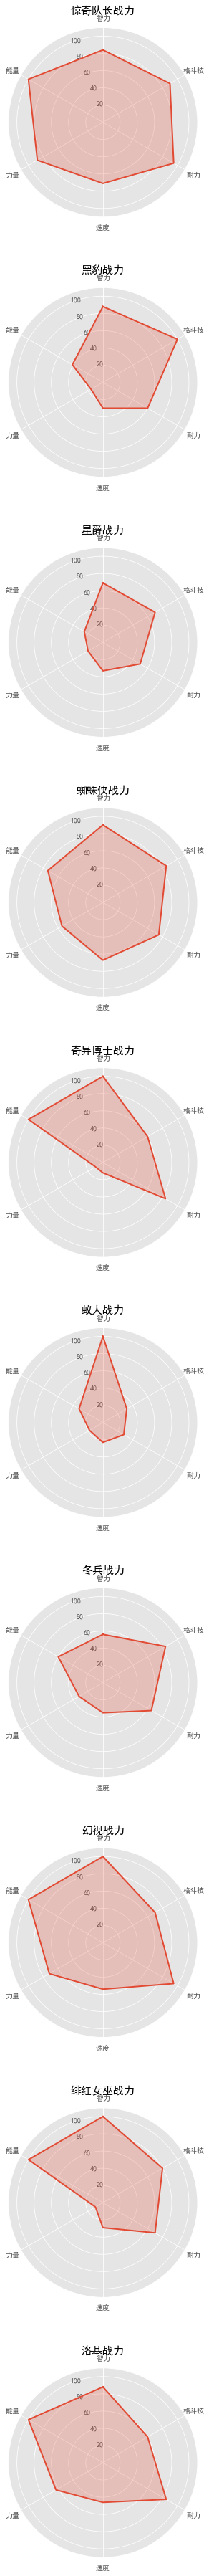

In [59]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.figure(figsize=(5, 50))

names_cn = ['惊奇队长','黑豹','星爵','蜘蛛侠','奇异博士','蚁人','冬兵','幻视','绯红女巫','洛基']
names = ['Captain Marvel','Black Panther','Star-Lord','Spider-Man','Doctor Strange',
           'Ant-Man','Winter Soldier','Vision','Scarlet Witch','Loki']

scores = pd.DataFrame({'name':names}) 
scores = scores.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
# 删除多余列
scores = scores.drop(index=[0,5,6])
scores = scores.values.tolist()

zipped = zip(scores,names_cn)

# title = ['intelligence','power','strength','speed','durability','combat']   #标签
title = ['智力', '能量', '力量', '速度', '耐力', '格斗技']  # 标签

for i,(value, name) in enumerate(zipped): 
    ax= 'ax%s'%i
    theta = np.linspace(0, 2*np.pi, len(value), endpoint=False)  # 将圆根据标签的个数等比分
    theta = np.concatenate((theta, [theta[0]]))  # 闭合
    
    value = np.concatenate((value, [value[0]]))  # 闭合
    ax = plt.subplot2grid(shape=(10,1), loc=(i,0),polar=True)
    ax.plot(theta, value, lw=2, alpha=1,label=name)  # 绘图
    ax.fill(theta, value, alpha=0.25)  # 填充

    ax.set_thetagrids(theta*180/np.pi,title)         #替换标签
    ax.set_ylim(0,110)                          #设置极轴的区间
    ax.set_theta_zero_location('N')         #设置极轴方向
    ax.set_title('%s战力'%name,fontsize = 15)   #添加图描述
 
plt.tight_layout(h_pad=5.0)
plt.savefig('十位英雄单人战力.jpg',dpi=200)

#### 十位成员汇总 

In [66]:
# 10位重要的hero
names = ['Man of Miracles','Black Panther','Doctor Strange','Vision','Scarlet Witch','Loki']
scores = pd.DataFrame({'name':names}) 

# scores = scores.merge(data,how='left',on='name')

scores = scores.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
# 删除多余列
scores = scores.drop(index=[0])
scores
# dataframe 转list

,intelligence,power,strength,speed,durability,combat
1,84.0,100.0,88.0,71.0,95.0,90.0
2,88.0,41.0,16.0,30.0,60.0,100.0
3,100.0,100.0,10.0,12.0,84.0,60.0
4,100.0,100.0,72.0,54.0,95.0,70.0
5,100.0,100.0,10.0,29.0,70.0,80.0
6,88.0,100.0,63.0,46.0,85.0,60.0


C:\Users\sony\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


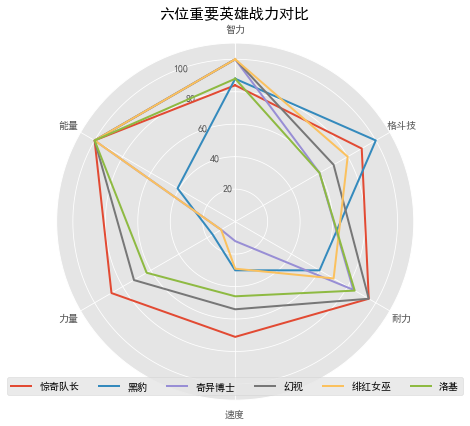

In [146]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))

# 10位重要的hero
names = ['Captain Marvel','Black Panther','Doctor Strange','Vision','Scarlet Witch','Loki']
scores = pd.DataFrame({'name':names}) 

scores = scores.merge(data,how='left',on='name')[['intelligence','power','strength','speed','durability','combat']]
# 删除多余列
scores = scores.drop(index=[0])
# dataframe 转list
scores = scores.values.tolist()
names_cn = ['惊奇队长','黑豹','奇异博士','幻视','绯红女巫','洛基']
names = ['Captain Marvel','Black Panther','Doctor Strange','Vision','Scarlet Witch','Loki']

zipped = zip(scores,names_cn)
title = ['智力', '能量', '力量', '速度', '耐力', '格斗技']  # 标签
for value, name in zipped: 
    theta = np.linspace(0, 2*np.pi, len(value), endpoint=False)  # 将圆根据标签的个数等比分
    theta = np.concatenate((theta, [theta[0]]))  # 闭合
    value = np.concatenate((value, [value[0]]))  # 闭合
    # 这里一定要设置为极坐标格式
    ax = fig.add_subplot(111, polar=True)
    ax.plot(theta, value, lw=2, alpha=1,label=name)  # 绘图
#     ax.fill(theta, value, alpha=0.25)  # 填充

ax.set_thetagrids(theta*180/np.pi,title)         #替换标签
ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
ax.set_title('六位重要英雄战力对比',fontsize = 15)   #添加图描述
 
plt.legend(loc='lower center',ncol=6)
plt.tight_layout()
fig.savefig('六位重要英雄战力对比.jpg',dpi=200)

### 漫威电影票房 

#### 国内票房

In [101]:
 movie = ['战狼2','流浪地球','复仇者联盟4','红海行动','唐人街探案2','美人鱼','我不是药神','速度与激情8','西红市首富','捉妖记']

income = [56.83,46.55,38.25,36.51,33.98,33.86,31.00,26.71,25.48,24.40]
data_movies = pd.DataFrame({'movie':movie,'income':income})[::-1] #倒序
data_movies

,movie,income
9,捉妖记,24.40
8,西红市首富,25.48
7,速度与激情8,26.71
6,我不是药神,31.00
5,美人鱼,33.86
4,唐人街探案2,33.98
3,红海行动,36.51
2,复仇者联盟4,38.25
1,流浪地球,46.55
0,战狼2,56.83


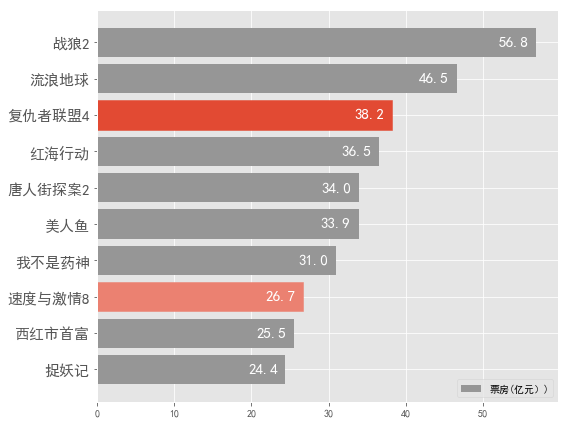

In [103]:
# 绘制票房条形图 
# https://stackoverflow.com/questions/37447056/different-colors-for-rows-in-barh-chart-from-pandas-dataframe-python
# 可以单独设置颜色，或者list分别设置 

plt.style.use('ggplot')
# fig,ax = plt.subplots(figsize=(6,10))
fig,ax = plt.subplots(figsize=(8,6))

grey = '#969696'#深灰
red = '#E24A33' #红色

barh = ax.barh(np.arange(10),
               data_movies['income'],
               color='#969696')
# 单独为复联4和速8上色
barh[7].set_color(red)
barh[2].set_color('#EB8171')

for y,x in enumerate(data_movies['income'].values.tolist()):
   ax.text(x-1,y-0.1,'%s'%round(x,1),
            ha='right',
            size=15,
            color='#FFFFFF')
ax.set_yticks(np.arange(10))
ax.set_yticklabels(data_movies['movie'].tolist(),size=15)
# ax.set_xlim(0,62)

ax.legend(['票房(亿元）)'],loc='best')
plt.tight_layout()
plt.savefig('china.jpg',dpi=200)

# 注意dataframe.plot.barh 不能单独更改颜色
# data_movies.plot.barh(x='movie',
#                      figsize=(10,6),
#                      )

#### 全球票房 

In [104]:
movies = ['阿凡达','泰坦尼克号','星球大战：原力觉醒','复仇者联盟3','复仇者联盟4','侏罗纪世界','复仇者联盟','速度与激情7','复仇者联盟2','黑豹']

income = [27.88,21.87,20.68,20.48,19.14,16.72,15.19,15.16,14.05,13.47,]
data_movies = pd.DataFrame({'movie':movies,'income':income})[::-1]#倒序

data_movies

,movie,income
9,黑豹,13.47
8,复仇者联盟2,14.05
7,速度与激情7,15.16
6,复仇者联盟,15.19
5,侏罗纪世界,16.72
4,复仇者联盟4,19.14
3,复仇者联盟3,20.48
2,星球大战：原力觉醒,20.68
1,泰坦尼克号,21.87
0,阿凡达,27.88


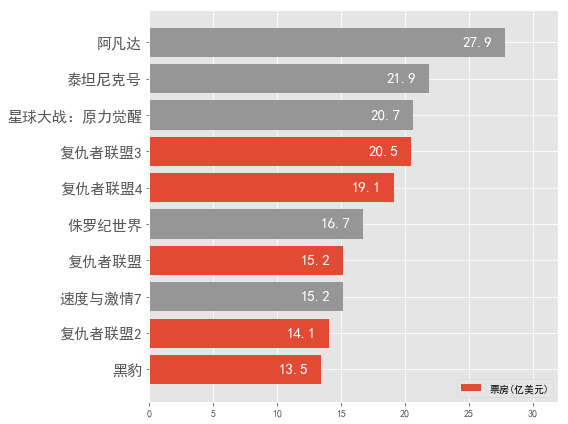

In [105]:
# 绘制票房条形图
# https://stackoverflow.com/questions/37447056/different-colors-for-rows-in-barh-chart-from-pandas-dataframe-python
# 可以单独设置颜色，或者list分别设置

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))

grey = '#969696'  # 深灰
red = '#E24A33'  # 红色
# 批量设置颜色
color = [red, red, grey, red, grey, red, red, grey, grey, grey]

barh = ax.barh(np.arange(10),
               data_movies['income'],
               color=color)

for y, x in enumerate(data_movies['income'].values.tolist()):
    ax.text(x-1, y-0.1, '%s' % round(x, 1),
            ha='right',
            size=15,
            color='#FFFFFF')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(data_movies['movie'].tolist(), size=15)
ax.set_xlim(0, 32)

ax.legend(['票房(亿美元)'], loc='best')

plt.tight_layout()
plt.savefig('global.jpg', dpi=200)